Total real defects detected: 100


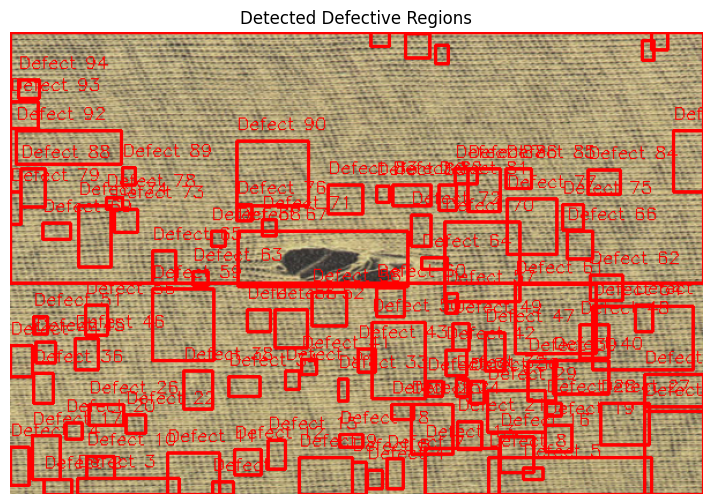

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load reference (perfect) and test (defective) images
ref = cv2.imread("C:\\Users\\Wesli\\Downloads\\fabric 5.jpg")
test = cv2.imread("C:\\Users\\Wesli\\Downloads\\fabric 4.jpg")

# Resize both to same shape (very important)
ref = cv2.resize(ref, (600, 400))
test = cv2.resize(test, (600, 400))

# Convert to grayscale
ref_gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
test_gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

# Subtract images to find differences
diff = cv2.absdiff(ref_gray, test_gray)

# Threshold the difference (you may adjust 30)
_, mask = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

# Clean small noise
kernel = np.ones((3, 3), np.uint8)
clean_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
clean_mask = cv2.dilate(clean_mask, kernel, iterations=1)

# Find contours on the difference mask
contours, _ = cv2.findContours(clean_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw boxes on the defective image
defect_count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 100:  # filter very small differences
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(test, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(test, f'Defect {defect_count + 1}', (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        defect_count += 1

print(f"Total real defects detected: {defect_count}")

# Show final output
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
plt.title("Detected Defective Regions")
plt.axis("off")
plt.show()
